In [17]:
import numpy as np
import time


print("***********************MATRIX MULTIPLICATION***********************")
one_more_time = "y"
while(one_more_time == "y"):
    print("You have two matrices A(MxN) and B(NxK) that you want to multiply.")
    M, N, K = input("Enter their dimensions(M, N, K): ").split(",")
    M, N, K = int(M), int(N), int(K)

    A = np.random.rand(M, N)
    B = np.random.rand(N, K)

    own_elements = input("Do you want to specify your own elements?(y/n) ").lower()

    if own_elements == "y":
        for i in range(N):
            for j in range(M):
                A(i, j) = input(f"Chose element ({i}, {j} of matrix A: ")
        for i in range(M):
            for j in range(K):
                B(i, j) = input(f"Chose element ({i}, {j} of matrix B: ")

    python_multiply(A, B)



    one_more_time = input("Do you want to calculate anoter matrix multiply?(y/n) ").lower()


***********************MATRIX MULTIPLICATION***********************
You have two matrices A(MxN) and B(NxK) that you want to multiply.
Generating random matrices


In [27]:
import time
def python_multiply(A, B):
    start = time.perf_counter()
    C = A @ B
    end = time.perf_counter()
    print(f"Python matrix multiplication took {end-start} seconds")
    return C


In [37]:
M, N, K = 2, 3, 2

A = np.random.rand(M, N)
B = np.random.rand(N, K)




In [20]:
a = [0, 0]
for elem in a:
    elem = 1

a

array([[0.38948166, 0.82015563, 0.61228203, 0.92086466],
       [0.45841499, 0.74941238, 0.26432393, 0.71001713],
       [0.35671721, 0.00961909, 0.92334744, 0.43566189]])

In [38]:
a = [0, 0]
for elem in a:
    elem = 1

a

[0, 0]

In [3]:
import numpy as np
A = np.random.rand(2, 3)
B = np.random.rand(3, 2)
type(A[0, 0])

numpy.float64

GPU with only global memory time: 0.005633750999550102
GPU with shared memory time: 0.001225297000928549
Python time: 0.0011446409989730455
GPU with only global memory time: 0.0005383809984778054
GPU with shared memory time: 0.0008095949997368734
Python time: 9.187900286633521e-05
GPU with only global memory time: 0.0003939259986509569
GPU with shared memory time: 0.0009466510018683039
Python time: 0.00012581999908434227
GPU with only global memory time: 0.0004617239974322729
GPU with shared memory time: 0.001253899001312675
Python time: 0.00010681999992812052
GPU with only global memory time: 0.0063972919997468125
GPU with shared memory time: 0.002858894000382861
Python time: 0.00017102700076065958
GPU with only global memory time: 0.0004102689999854192
GPU with shared memory time: 0.0008609430005890317
Python time: 0.0002147920022252947
GPU with only global memory time: 0.0003561350022209808
GPU with shared memory time: 0.0007969269972818438
Python time: 7.136400017770939e-05
GPU wit

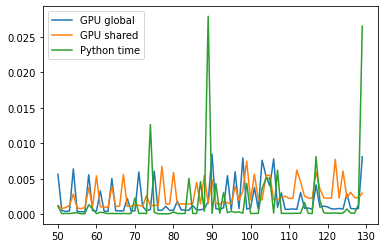

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

import sys
sys.path.append('build')
import gpu_library

def python_multiply(A, B):
    start = time.perf_counter()
    C = A @ B
    end = time.perf_counter()
    print(f"Python matrix multiplication took {end-start} seconds")
    return C


def main():
    # print("***********************MATRIX MULTIPLICATION***********************")
    # one_more_time = "y"
    # while(one_more_time == "y"):
    #     print("You have two matrices A(MxN) and B(NxK) that you want to multiply.")
    #     M, N, K = input("Enter their dimensions(M, N, K): ").split(",")
    #     M, N, K = int(M), int(N), int(K)

    #     A = np.random.rand(M, N)
    #     B = np.random.rand(N, K)

    #     own_elements = input("Do you want to specify your own elements?(y/n) ").lower()

    #     if own_elements == "y":
    #         for i in range(M):
    #             for j in range(N):
    #                 A[i, j] = float(input(f"Chose element ({i}, {j}) of matrix A: "))
    #         for i in range(N):
    #             for j in range(K):
    #                 B[i, j] = float(input(f"Chose element ({i}, {j}) of matrix B: "))

    #     python_multiply(A, B)



    #     one_more_time = input("Do you want to calculate anoter matrix multiply?(y/n) ").lower()
    # start = time.perf_counter()
    # C_CPU = np.zeros(M*K)
    # gpu_library.cpu_matrix_multiply(A.reshape(M*N), B.reshape(N*K), C_CPU, M, N, K)
    # end = time.perf_counter()
    # print("CPU in C++ time: " + str(end-start))
    # M, N, K = 32*4, 32*4, 32*4
    m, n, k = [i for i in range(70, 150)], [i for i in range(50, 200)], [i for i in range(50, 200)]
    time_gpu_global = []
    time_gpu_shared = []
    time_python = []
    Ns = []
    
    for M, N, K in zip(m, n, k):
        Ns.append(N)
        A = np.random.rand(M, N)
        B = np.random.rand(N, K)

        start = time.perf_counter()
        C_GPU_GLOBAL = np.zeros(M*K)
        gpu_library.cuda_global_matrix_multiply(A.reshape(M*N), B.reshape(N*K), C_GPU_GLOBAL, M, N, K)
        end = time.perf_counter()
        time_gpu_global.append(end-start)
        print("GPU with only global memory time: " + str(end-start))

        start = time.perf_counter()
        C_GPU_SHARED = np.zeros(M*K)
        gpu_library.cuda_shared_matrix_multiply(A.reshape(M*N), B.reshape(N*K), C_GPU_SHARED, M, N, K)
        end = time.perf_counter()
        time_gpu_shared.append(end-start)
        print("GPU with shared memory time: " + str(end-start))

        start = time.perf_counter()
        C_PYTHON = A @ B
        end = time.perf_counter()
        time_python.append(end-start)
        print("Python time: " + str(end-start))


        if not np.allclose(C_GPU_SHARED.reshape(M, K),C_PYTHON):
            print(f"Error on shared size {N}")

        if not np.allclose(C_GPU_GLOBAL.reshape(M, K),C_PYTHON):
            print(f"Error on global size {N}")
    plt.plot(Ns, time_gpu_global)
    plt.plot(Ns, time_gpu_shared)
    plt.plot(Ns, time_python)
    plt.legend(["GPU global", "GPU shared", "Python time"])
    plt.show
    # print(f"\nCPU in C++ result correct: {np.allclose(C_CPU.reshape(M, K),C_PYTHON)}")
    # print(f"GPU with only global memory correct: {np.allclose(C_GPU_GLOBAL.reshape(M, K),C_PYTHON)}")
    # print(f"GPU with shared memory correct: {np.allclose(C_GPU_SHARED.reshape(M, K),C_PYTHON)}")


main()